In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("experiment_result.csv", index_col=0)
df2 = pd.read_csv("experiment2_result.csv", index_col=0)

In [3]:
df = pd.concat([df1, df2], axis=0)
df

,train_size,device,model,features_type,random_seed,repeat,r2_mean,r2_std,kendal_mean,kendal_std
0,11,edgegpu,XGBRegressor,only_features,42,100,0.217558,0.179030,0.395462,0.104014
1,11,edgegpu,XGBRegressor,only_proxies,42,100,0.013497,0.321237,0.341174,0.107159
2,11,edgegpu,XGBRegressor,features_proxies,42,100,0.275171,0.155543,0.426292,0.086486
3,11,eyeriss,XGBRegressor,only_features,42,100,0.355877,0.190050,0.514372,0.113137
4,11,eyeriss,XGBRegressor,only_proxies,42,100,0.002337,0.244910,0.337301,0.115125
...,...,...,...,...,...,...,...,...,...,...
85,15000,eyeriss,XGBRegressor,features_one_hot,42,100,0.999938,0.000239,0.990238,0.000911
86,15000,eyeriss,XGBRegressor,features_one_hot_proxies,42,100,0.999938,0.000239,0.988455,0.000952
87,15000,fpga,XGBRegressor,only_one_hot,42,100,0.999967,0.000004,0.986937,0.000615
88,15000,fpga,XGBRegressor,features_one_hot,42,100,0.999946,0.000177,0.987352,0.000725


In [4]:
baseline = pd.read_csv("baseline.csv")
baseline["features_type"] = "baseline"
baseline

,train_size,device,kendal_mean,features_type
0,11,edgegpu,0.375,baseline
1,25,edgegpu,0.284,baseline
2,55,edgegpu,0.728,baseline
3,124,edgegpu,0.792,baseline
4,276,edgegpu,0.810,baseline
5,614,edgegpu,0.821,baseline
6,1366,edgegpu,0.823,baseline
7,3036,edgegpu,0.824,baseline
8,6748,edgegpu,0.831,baseline
9,15000,edgegpu,0.831,baseline


In [5]:
lr1 = pd.read_csv("linear_result.csv", index_col=0)
lr2 = pd.read_csv("linear_result2.csv", index_col=0)
lr = pd.concat([lr1, lr2], ignore_index=True)
lr["features_type"] = lr["features_type"].apply(lambda x: "LR_"+x)
lr

,train_size,device,model,features_type,random_seed,repeat,r2_mean,r2_std,kendal_mean,kendal_std
0,11,edgegpu,Linear,LR_only_one_hot,42,100,1.426185e-01,3.227238e-01,0.359039,0.093419
1,11,edgegpu,Linear,LR_features_one_hot,42,100,3.488850e-01,4.262213e-01,0.501211,0.125009
2,11,edgegpu,Linear,LR_features_one_hot_proxies,42,100,-1.782488e+11,2.748344e+11,0.238519,0.141248
3,11,eyeriss,Linear,LR_only_one_hot,42,100,3.639419e-01,1.794519e-01,0.445745,0.098150
4,11,eyeriss,Linear,LR_features_one_hot,42,100,8.423945e-01,7.914711e-02,0.802407,0.052818
...,...,...,...,...,...,...,...,...,...,...
175,15000,eyeriss,Linear,LR_full_features_one_hot,42,100,1.000000e+00,0.000000e+00,0.985790,0.000906
176,15000,eyeriss,Linear,LR_full_features_one_hot_proxies,42,100,1.000000e+00,0.000000e+00,0.985301,0.000888
177,15000,fpga,Linear,LR_only_full_features,42,100,1.000000e+00,0.000000e+00,0.987711,0.000803
178,15000,fpga,Linear,LR_full_features_one_hot,42,100,1.000000e+00,0.000000e+00,0.987451,0.000650


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

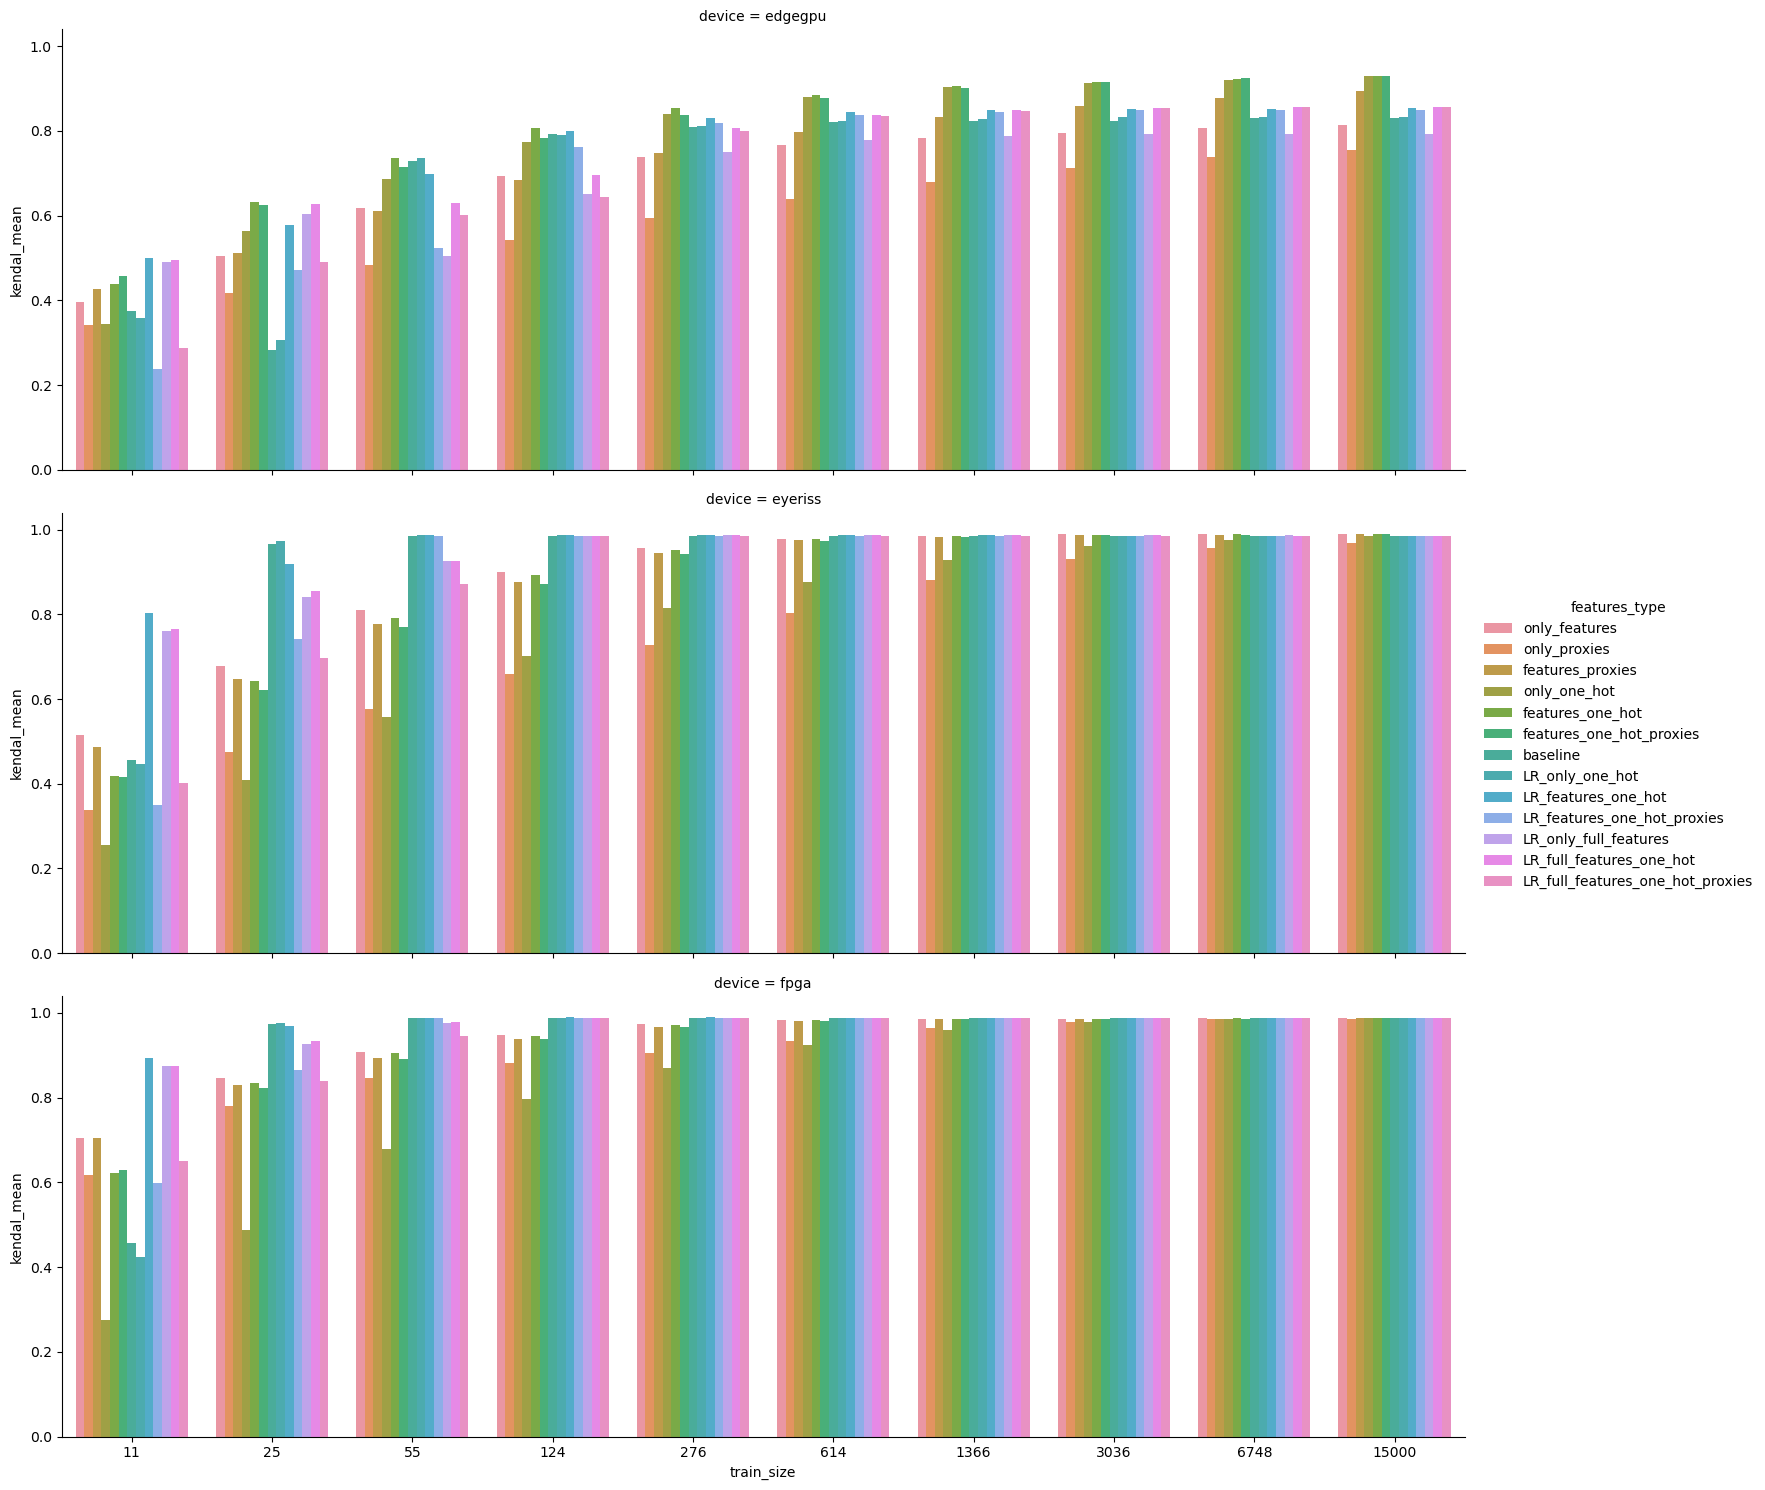

In [7]:
sel = df.drop(columns=["model", "random_seed", "repeat", "r2_mean", "r2_std", "kendal_std"])
lr = lr.drop(columns=["model", "random_seed", "repeat", "r2_mean", "r2_std", "kendal_std"])
sel = pd.concat([sel, baseline, lr])
sns.catplot(
    data=sel, 
    x="train_size", 
    y="kendal_mean", 
    hue="features_type", 
    kind="bar", 
    row="device",
    aspect=3
)

In [8]:
device="edgegpu"
onedevice = sel[sel["device"]==device]
print(device.upper())
onedevice.pivot(columns="train_size", index="features_type", values="kendal_mean")

EDGEGPU


train_size,11,25,55,124,276,614,1366,3036,6748,15000
features_type,,,,,,,,,,
LR_features_one_hot,0.501211,0.576823,0.698521,0.800651,0.831563,0.844746,0.849647,0.851814,0.852856,0.853123
LR_features_one_hot_proxies,0.238519,0.472798,0.523283,0.761459,0.818293,0.837777,0.845248,0.848405,0.849841,0.850503
LR_full_features_one_hot,0.494152,0.628376,0.629039,0.696506,0.807910,0.838448,0.849195,0.853672,0.855729,0.856571
LR_full_features_one_hot_proxies,0.287506,0.489516,0.600650,0.644639,0.798988,0.834403,0.847701,0.853079,0.855520,0.856327
LR_only_full_features,0.490197,0.603258,0.504183,0.651707,0.750876,0.778293,0.788079,0.791943,0.793737,0.793773
LR_only_one_hot,0.359039,0.307038,0.735491,0.790697,0.812270,0.822445,0.827878,0.831694,0.833403,0.833724
baseline,0.375000,0.284000,0.728000,0.792000,0.810000,0.821000,0.823000,0.824000,0.831000,0.831000
features_one_hot,0.438469,0.631049,0.737056,0.806616,0.853880,0.885748,0.905146,0.915542,0.922283,0.928560
features_one_hot_proxies,0.456979,0.624474,0.715078,0.784291,0.837152,0.877614,0.901492,0.915855,0.924591,0.930376
